<a href="https://colab.research.google.com/github/EverHernandez01/Senales_y-_Sistemas_2025_S2/blob/main/Soluci%C3%B3n_Taller/Taller_transformada_de_furiel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller Transformada de Fourier

---
Ever Daniel Hernández Tulcán

 Transformada de Fourier

1. Consultar y realizar los ejercicios propuestos en el cuaderno Transformada de Fourier.

2. Explique las semejanzas y diferencias entre la serie de Fourier (exponencial, trigonométrica y compacta), la transformada de Fourier, transformada de Fourier en tiempo discreto (DTFT) y transformada discreta de Fourier (DFT).Considere las diferentes combinaciones entre: espectro continuo y discretoy señal en tiempo continuo y discreto. Además, consulte en qué consiste el algoritmo Fast Fourier Transform (FFT) y su utilidad para el cálculo de la transformada discreta de Fourier. Explique en detalle el algoritmo FFT y su costo computacional vs el de la transformada discreta. Ver cuaderno Transformada de Fourier.

3. Encuentre la función de densidad espectral (transformada de Fourier)
% para las siguientes señales (sin aplicar propiedades):

$$
\begin{aligned}
\text{a)}\quad & e^{-a|t|}, \qquad a\in\mathbb{R}^+\\[6pt]
\text{b)}\quad & \cos(\omega_c t), \qquad \omega_c\in\mathbb{R}\\[6pt]
\text{c)}\quad & \sin(\omega_s t), \qquad \omega_s\in\mathbb{R}\\[6pt]
\text{d)}\quad & f(t)\cos(\omega_c t), \qquad \omega_c\in\mathbb{R},\; f(t)\in\mathbb{R},\mathbb{C}\\[6pt]
\text{e)}\quad & e^{-a|t|^2}, \qquad a\in\mathbb{R}^+\\[6pt]
\text{f)}\quad & A\,\mathrm{rect}(t), \qquad A\in\mathbb{R},\; d\in\mathbb{R}
\end{aligned}
$$



$$Punto\ 1,2$$
Fourier “en una sola pasada”: qué usar, cuándo y por qué (SF, FT, DTFT, DFT y FFT)

## 1) Procedimiento general para resolver el ejercicio
1. **Clasifica la señal**:
   - ¿Es **tiempo continuo** \(x(t)\) o **tiempo discreto** \(x[n]\)?
   - ¿Es **periódica** o **aperiódica**? ¿Finita (longitud \(N\)) o infinita?

2. **Elige la herramienta adecuada** (según 1):
   - **Continuo + Periódica** → **Serie de Fourier** (SF).
   - **Continuo + Aperiódica** → **Transformada de Fourier** (FT).
   - **Discreto + Aperiódica** → **DTFT**.
   - **Discreto + Finita (long. \(N\))** → **DFT** (y computacionalmente **FFT** para calcularla).

3. **Determina la “textura” del espectro**:
   - **Periódica en tiempo** → **Espectro discreto** (líneas).
   - **Aperiódica en tiempo** → **Espectro continuo**.
   - **Discreta en tiempo** → espectro **periódico** en frecuencia (DTFT y DFT).

4. **Aplica la fórmula correspondiente** (ver Secc. 2–5) y relaciona equivalencias:
   - SF trig ↔ SF exp ↔ SF compacta (misma info).
   - DFT = **muestras** de la DTFT en rejilla uniforme.
   - FT de periódica = tren de impulsos (caso SF).

5. **(Si se requiere cómputo)**: para DFT usa **FFT** por eficiencia (ver Secc. 6–7).

---

## 2) Serie de Fourier (tiempo continuo, **periódica**) ⇒ **espectro discreto**
**Trigonométrica**  
$$
x(t)=\frac{a_0}{2}+\sum_{n=1}^{\infty}\big[a_n\cos(n\omega_0 t)+b_n\sin(n\omega_0 t)\big],\quad \omega_0=\frac{2\pi}{T}.
$$

**Exponencial**  
$$
x(t)=\sum_{n=-\infty}^{\infty} c_n\,e^{j n \omega_0 t},\qquad
c_n=\frac{1}{T}\int_T x(t)\,e^{-j n \omega_0 t}\,dt.
$$

**Compacta (magnitud–fase)**  
$$
x(t)=\frac{a_0}{2}+\sum_{n=1}^{\infty} A_n \cos\!\big(n\omega_0 t+\phi_n\big),
\quad A_n=\sqrt{a_n^2+b_n^2},\ \ \phi_n=\tan^{-1}\!\left(\frac{-b_n}{a_n}\right).
$$

**Conexiones**:  
$$a_n=c_n+c_{-n},\qquad b_n=j(c_n-c_{-n}).$$  
**Idea clave**: periodicidad en tiempo ⇒ líneas en múltiplos de \(\omega_0\).

---

## 3) Transformada de Fourier (FT) (tiempo continuo, **aperiódica**) ⇒ **espectro continuo**
$$
X(\omega)=\int_{-\infty}^{\infty} x(t)\,e^{-j\omega t}\,dt,\qquad
x(t)=\frac{1}{2\pi}\int_{-\infty}^{\infty} X(\omega)\,e^{j\omega t}\,d\omega.
$$

Si \(x(t)\) fuese periódica, su FT es un **tren de impulsos** (caso Serie de Fourier).

---

## 4) DTFT (tiempo **discreto**, **aperiódica**) ⇒ **espectro continuo y periódico** en \(2\pi\)
$$
X(e^{j\omega})=\sum_{n=-\infty}^{\infty} x[n]\ e^{-j\omega n},\qquad \omega\in(-\pi,\pi].
$$
- Continuo en \(\omega\) pero **periódico** con periodo \(2\pi\).

---

## 5) DFT (tiempo **discreto**, **finita** de longitud \(N\)) ⇒ **espectro discreto y periódico**
$$
X[k]=\sum_{n=0}^{N-1} x[n]\ e^{-j\frac{2\pi}{N}kn},\quad
x[n]=\frac{1}{N}\sum_{k=0}^{N-1} X[k]\ e^{j\frac{2\pi}{N}kn},\quad k=0,\dots,N-1.
$$
- La DFT toma **muestras** de la DTFT en \(\omega_k=2\pi k/N\).
- Asume extensión **periódica** de \(x[n]\) con periodo \(N\).

---

## 6) Mapa unificador (tiempo vs espectro)
- **Continuo + Periódica (SF)** → **Espectro discreto** (líneas).
- **Continuo + Aperiódica (FT)** → **Espectro continuo**.
- **Discreto + Aperiódica (DTFT)** → **Espectro continuo y periódico** en \(2\pi\).
- **Discreto + Finita (DFT)** → **Espectro discreto y periódico** (muestras de DTFT).

**Reglas mentales**:
- Periodicidad en **tiempo** ⇒ **discreción** en **frecuencia**.  
- Aperiodicidad en **tiempo** ⇒ **continuidad** en **frecuencia**.  
- Muestrear/ventanear en tiempo impacta periodicidad/anchura en frecuencia.

---

## 7) ¿Qué es la FFT y para qué sirve?
La **FFT (Fast Fourier Transform)** es una **familia de algoritmos** para **calcular la DFT** de forma eficiente.

- **Costo DFT directa:** $$O(N^2)$$ (cada \(X[k]\) suma \(N\) términos, y hay \(N\) salidas).
- **Costo FFT (p.ej., Cooley–Tukey radix-2):** $$O(N\log_2 N)$$  
  Ej.: \(N=4096\) → \(N^2\approx 16.8\) millones vs \(N\log_2 N\approx 49{,}152\).

**Utilidad**: hace **viable** el análisis espectral, convolución rápida (filtrado por frecuencia), comunicaciones (OFDM), audio, imagen, radar, etc.

---

## 8) FFT en detalle: idea del algoritmo (Cooley–Tukey radix-2, DIT)
**Suposición**: \(N=2^m\). (Para otros \(N\) hay variantes radix-mixta, Bluestein, Rader, etc.)

1. **Divide** la secuencia en **pares** e **impares**:  
   \(x_e[n]=x[2n]\), \(x_o[n]=x[2n+1]\) (cada una de longitud \(N/2\)).
2. **Computa** dos DFTs pequeñas: \(E[k]=\text{DFT}(x_e)\), \(O[k]=\text{DFT}(x_o)\).
3. **Combina** con **mariposas** (butterflies) usando factores “twiddle” \(W_N=e^{-j\frac{2\pi}{N}}\):
   $$
   X[k]=E[k]+W_N^k\,O[k],\quad
   X[k+N/2]=E[k]-W_N^k\,O[k],\quad k=0,\dots,\frac{N}{2}-1.
   $$
4. **Recursiona** hasta llegar a DFTs de tamaño 2/4 (triviales).  
   - Niveles: \(\log_2 N\).  
   - Trabajo por nivel: \(\approx N\).  
   - **Total**: \(\approx N\log_2 N\).

**Notas prácticas**:
- **DIT** (decimation-in-time) y **DIF** (decimation-in-frequency) cambian el orden de operaciones, no la complejidad.
- Para \(N\) no potencia de 2: usar **radix-mixta** o **Bluestein**.
- En cómputo real: usar librerías optimizadas (NumPy/FFTW/CuFFT).

---

## 9) Conexiones prácticas (DFT ↔ DTFT ↔ FT/SF)
- **DFT ≈ DTFT muestreada** para una señal **finita** (o **ventaneada**).  
- **Zero-padding** refina la malla en frecuencia (no agrega nueva información física).  
- **Leakage**: si la ventana \(N\) no contiene un número entero de períodos, aparece derrame espectral; mitigar con **ventanas** (Hann, Hamming, Blackman).

---

## 10) Conclusión operativa para el informe
- Si la señal es **continua periódica**, use **Serie de Fourier** (formas trig/exponencial/compacta = misma info).  
- Si es **continua aperiódica**, use **FT** (espectro continuo).  
- Si es **discreta aperiódica**, use **DTFT** (continuo y **periódico**).  
- Si es **discreta finita**, use **DFT**; **cómprela con FFT** (es la *misma* DFT, pero computada en \(O(N\log N)\) en lugar de \(O(N^2)\)).  
- La **FFT** no es otra transformada: es *el algoritmo rápido* que hace posible el cálculo de la **DFT** en la práctica.

$$Ejercicio\ 1.3$$
Encuentre la funcion de densidad espectral (transformada de ´
Fourier) para las siguientes senales (sin aplicar propiedades): ˜
a) e
−a|t|
, a∈R
+; b) cos (wct), wc∈R; c) sin (wst), ws∈R;
d) f(t) cos (wct), wc∈R, f(t)∈R,C; e) e
−a|t|
2
, a∈R
+. f)
Arectd(t), A, d∈R.

Transformada de Fourier de señales básicas

a) $f(t)=e^{-a|t|},\ a>0$}

Separando la integral en $$[0,\infty) y (-\infty,0]$$:

$$
F(\omega)
= \int_{-\infty}^{\infty} e^{-a|t|} e^{-j\omega t}\,dt
= \int_{0}^{\infty} e^{-(a+j\omega)t}\,dt
+ \int_{0}^{\infty} e^{-(a-j\omega)t}\,dt
$$

$$
F(\omega)
= \frac{1}{a+j\omega} + \frac{1}{a-j\omega}
= \frac{2a}{a^2 + \omega^2}
$$

Por tanto,

$$
\boxed{F\{e^{-a|t|}\}(\omega) = \frac{2a}{a^2 + \omega^2},\quad a>0}
$$



b) $f(t)=\cos(\omega_c t)$

Usando la identidad de Euler:

$$
\cos(\omega_c t)=\frac{1}{2}\left(e^{j\omega_c t}+e^{-j\omega_c t}\right)
$$

La transformada de $e^{j\omega_c t}$ es $2\pi\delta(\omega-\omega_c)$ bajo la convención
$F(\omega)=\int f(t)e^{-j\omega t}\,dt$.
Por linealidad:

$$
F\{\cos(\omega_c t)\}(\omega)
= \frac{1}{2}\big[2\pi\delta(\omega-\omega_c) + 2\pi\delta(\omega+\omega_c)\big]
$$

$$
\boxed{F\{\cos(\omega_c t)\}(\omega)
= \pi\big[\delta(\omega-\omega_c)+\delta(\omega+\omega_c)\big]}
$$


c) $f(t)=\sin(\omega_c t)$

Recordando que

$$
\sin(\omega_c t)=\frac{1}{2j}\left(e^{j\omega_c t}-e^{-j\omega_c t}\right)
$$

se obtiene:

$$
F\{\sin(\omega_c t)\}(\omega)
= \frac{1}{2j}\big[2\pi\delta(\omega-\omega_c) - 2\pi\delta(\omega+\omega_c)\big]
$$

$$
\boxed{F\{\sin(\omega_c t)\}(\omega)
= j\pi\big[\delta(\omega-\omega_c) - \delta(\omega+\omega_c)\big]}
$$


d) $f(t)=A\,\mathrm{rect}\!\left(\frac{t}{d}\right)$

Definimos $\mathrm{rect}(t/d)=1$ para $|t|<d/2$ y $0$ fuera. Entonces:

$$
F(\omega)
= A \int_{-d/2}^{d/2} e^{-j\omega t}\,dt
= A\left[\frac{e^{-j\omega t}}{-j\omega}\right]_{-d/2}^{d/2}
= A\frac{2\sin(\omega d/2)}{\omega}
$$

Usando la función sinc no normalizada $\mathrm{sinc}(x)=\frac{\sin x}{x}$:

$$
\boxed{F\{A\,\mathrm{rect}(t/d)\}(\omega)
= A\,d\,\mathrm{sinc}\!\left(\frac{\omega d}{2}\right)
= A\frac{2\sin(\omega d/2)}{\omega}}
$$

(la equivalencia se obtiene multiplicando y dividiendo por
𝑑
/
2
d/2.)

$$Ejercicio\ 1,4$$
Encuentre la función de densidad espectral( transformada de Fourier) para las siguientes señales ( sin Plicar propiedades):

a)

$$\mathcal{F}\{ e^{-j\omega_1 t} \cos(\omega_c t)\}$$

Usamos $\cos(\omega_c t)=\tfrac{1}{2}(e^{j\omega_c t}+e^{-j\omega_c t})$.

$$e^{-j\omega_1 t}\cos(\omega_c t)=\tfrac{1}{2}(e^{j(\omega_c-\omega_1)t}+e^{-j(\omega_c+\omega_1)t})$$

La transformada de $e^{j\alpha t}$ es $2\pi\delta(\omega-\alpha)$. Aplicando esto:


$$\mathcal{F}\{e^{-j\omega_1 t}\cos(\omega_c t)\}=\tfrac{1}{2}\big(2\pi\delta(\omega-(\omega_c-\omega_1))+2\pi\delta(\omega-(-\omega_c-\omega_1))\big)$$

Simplificando:
$$\boxed{\mathcal{F}\{e^{-j\omega_1 t}\cos(\omega_c t)\}=\pi[\delta(\omega-(\omega_c-\omega_1))+\delta(\omega+(\omega_c+\omega_1))]}$$

Esta es la forma en distribuciones: dos picos impulsivos en $\omega=\omega_c-\omega_1$ y $\omega=-\omega_c-\omega_1$.;

___________________________________________________________
b) $\mathcal{F}\{u(t)\cos^2(\omega_c t)\}, \omega_c \in \mathbb{R}$

Primero usa la identidad trigonométrica:
$$ \cos^2(\omega_c t) = \frac{1}{2}(1 + \cos(2\omega_c t)). $$

Entonces
$$ u(t)\cos^2(\omega_c t) = \frac{1}{2}u(t) + \frac{1}{2}u(t)\cos(2\omega_c t). $$

La FT de $u(t)$ es (distribución)
$$ U(\omega) = \pi\delta(\omega) + \frac{1}{j\omega}. $$

Para $u(t)\cos(2\omega_c t) = \frac{1}{2}u(t)(e^{j2\omega_c t} + e^{-j2\omega_c t})$ usamos desplazamiento en frecuencia:
$$ \mathcal{F}\{u(t)e^{j2\omega_c t}\} = U(\omega - 2\omega_c), \quad \mathcal{F}\{u(t)e^{-j2\omega_c t}\} = U(\omega + 2\omega_c). $$

Por tanto
$$ \mathcal{F}\{u(t)\cos^2(\omega_c t)\} = \frac{1}{2}U(\omega) + \frac{1}{2} \cdot \frac{1}{2}(U(\omega - 2\omega_c) + U(\omega + 2\omega_c)) $$
$$ = \frac{1}{2}U(\omega) + \frac{1}{4}(U(\omega - 2\omega_c) + U(\omega + 2\omega_c)) $$

y sustituyendo $U(\omega) = \pi\delta(\omega) + \frac{1}{j\omega}$ obtienes explícitamente:

$$ \mathcal{F}\{u(t)\cos^2(\omega_c t)\} = \frac{1}{2}\left(\pi\delta(\omega) + \frac{1}{j\omega}\right) + \frac{1}{4}\left(\pi\delta(\omega - 2\omega_c) + \frac{1}{j(\omega - 2\omega_c)} + \pi\delta(\omega + 2\omega_c) + \frac{1}{j(\omega + 2\omega_c)}\right) $$

(Recordatorio: los términos $1/(j\omega)$ son en sentido de valor principal.)

________________________________________________________

c) $\mathcal{F}^{-1}\{A(\omega)B(\omega)\}$ con algo como $\frac{7}{(...)} \cdot \frac{10}{(...)^2}$

Idea / método (porque la expresión en la imagen es un poco ambigua numéricamente):

- Si tienes un producto $A(\omega)B(\omega)$ y quieres la transformada inversa, usas
$$ a(t) = \mathcal{F}^{-1}\{A(\omega)\}, \quad b(t) = \mathcal{F}^{-1}\{B(\omega)\} $$
y entonces
$$ \mathcal{F}^{-1}\{A(\omega)B(\omega)\} = \frac{1}{2\pi} a(t) * b(t) $$

- Por lo tanto:
1. Identifica $A(\omega)$ y $B(\omega)$.
2. Usa tablas para encontrar $a(t) = \mathcal{F}^{-1}\{A\}$ y $b(t) = \mathcal{F}^{-1}\{B\}$. (Suelen ser exponenciales amortiguadas, rampas multiplicadas por exponentes, o funciones del tipo $t^n e^{-at}u(t)$.)
3. Convoluciona $a(t)$ y $b(t)$ y multiplica por $1/(2\pi)$.

Ejemplo típico de tablas:
- $\mathcal{F}^{-1}\left\{\frac{1}{(j\omega + a)}\right\} = e^{-at}u(t).$
- $\mathcal{F}^{-1}\left\{\frac{1}{(j\omega + a)^2}\right\} = te^{-at}u(t).$
- $\mathcal{F}^{-1}\left\{\frac{1}{(j\omega + a)^n}\right\} = \frac{t^{n-1}}{(n-1)!}e^{-at}u(t).$

Si me escribes LA expresión exacta (copiar-pegar) de (c) la resuelvo paso a paso: hallo $a(t)$ y $b(t)$ y calculo la convolución con el factor $1/(2\pi)$.

_______________________________________________________
d)

 $\mathcal{F}\{t^3\}$

Usamos la propiedad de derivadas en frecuencia (tomando $x(t) = 1$ cuyo FT es $2\pi\delta(\omega)$) o directamente la regla:

$$ \mathcal{F}\{t^n x(t)\} = j^n \frac{d^n}{d\omega^n} X(\omega). $$

Con $x(t) = 1$, $X(\omega) = 2\pi\delta(\omega)$. Para $n=3$:

$$ \mathcal{F}\{t^3\} = j^3 \frac{d^3}{d\omega^3} [2\pi\delta(\omega)]. $$

Como $j^3 = j^2 \cdot j = (-1) \cdot j = -j$, queda:

$$ \mathcal{F}\{t^3\} = -j 2\pi \delta^{(3)}(\omega) $$

donde $\delta^{(3)}(\omega)$ es la tercera derivada de la delta de Dirac (en el sentido de distribuciones).
___________________________________________________

e)
La expresión que muestras (resumiendo) es del tipo
$$ \frac{B}{T} \sum_{n=-\infty}^{+\infty} \left( \frac{1}{a^2 + (\omega - n\omega_0)^2} + \frac{1}{a^2 + (\omega + n\omega_0)^2} \right), $$
con $\omega_0 = \frac{2\pi}{T}$.

Interpretación y método:
- Observa que $\frac{2a}{a^2 + \omega^2}$ es la FT de $e^{-a|t|}$.
- Un sumatorio de términos desplazados en frecuencia típicamente aparece cuando en el dominio del tiempo tienes una señal periódica o una suma de impulsos en tiempo (poisson summation / transformada de una señal periódica).
- Concretamente, si tomas la transformada de una señal que es una serie de repeticiones (o la transformada de una convolución con un tren de impulsos), obtendrás sumas periódicas en $\omega$.

Para demostrar formalmente la igualdad o identificar la señal de tiempo correspondiente:
1. Empieza de la transformada conocida: $\mathcal{F}\{e^{-a|t|}\} = \frac{2a}{a^2 + \omega^2}$.
2. Usa la propiedad de muestreo/periodización: una señal periódica en el tiempo tiene espectro discreto (series de deltas), y la periodización en frecuencia equivale a muestrear o a replicar en tiempo, etc.
3. Con el factor $\frac{B}{T}\sum_n$ y las simetrías dadas, se puede identificar la señal de tiempo (normalmente una combinación de exponenciales amortiguadas sumadas periódico en tiempo o un tren de copias).



$$Ejercicio \ 1,5$$
Consulte en que consiste la modulacion por amplitud por
deteccion coherente y sus aplicaciones. Genere un ejemplo
ilustrativo sobre Python en el que se grafique las senales en
el tiempo y en frecuencia (utilizando la rfft) para: senal
mensaje tipo pulso rectangular y senal mensaje tipo coseno.
El usuario podra definir el ındice

- La modulación se entiende como el proceso mediante el cual una señal mensaje se adecuda al medio de transmisión.

- En radiofrecuencia, la modulación básica consiste en manipular la amplitud de una señal de alta frecuencia, denominada portadora, respecto al mensaje.

- Dicho proceso se conoce como modulación por amplitud.


- Se requiere entonces de una portadora (carrier) senoidal/cosenoidal:

$$c(t)=A_c\sin(2\pi F_c t)$$

- Para ilustrar el proceso, se trabaja con un mensaje tipo sen/cos:

$$m(t) = A_m \cos(2\pi F_m t)$$

- La modulación AM puede calibrarse en términos del índice de modulación:

$$I_m = \frac{Peak\{|m(t)|\}}{A_c}$$

 donde $Peak\{|m(t)|\}$ es el valor pico (máximo) de $|m(t)|$.




Ingrese el índice de modulación (por ejemplo, 0.5 o 1): 0.6


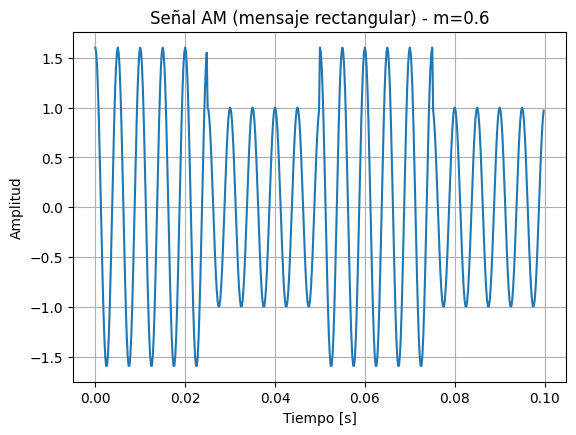

In [ ]:
#Ejemplo
import numpy as np
import matplotlib.pyplot as plt

Fs = 5000           # Frecuencia de muestreo [Hz]
Ts = 1/Fs           # Periodo de muestreo
t = np.arange(0, 0.1, Ts)  # Vector de tiempo (0.1 s)
fc = 200            # Frecuencia de la portadora [Hz]
fm = 20             # Frecuencia del mensaje (solo para coseno) [Hz]

# El usuario define el índice de modulación
m = float(input("Ingrese el índice de modulación (por ejemplo, 0.5 o 1): "))

m_pulso = np.where((t % (1/fm)) < (1/(2*fm)), 1, 0)

# 2. Señal mensaje tipo coseno
m_cos = np.cos(2*np.pi*fm*t)


# Señales moduladas (AM)

Ac = 1  # amplitud portadora
s_pulso = (1 + m * m_pulso) * Ac * np.cos(2*np.pi*fc*t)
s_cos = (1 + m * m_cos) * Ac * np.cos(2*np.pi*fc*t)

# Transformadas en frecuencia (rfft)

N = len(t)
freq = np.fft.rfftfreq(N, Ts)

S_pulso = np.abs(np.fft.rfft(s_pulso))
S_cos = np.abs(np.fft.rfft(s_cos))

plt.figure(figsize=(14,10))

# Señal pulso en tiempo
plt.subplot(2,2,1)
plt.plot(t, s_pulso, color='tab:blue')
plt.title(f'Señal AM (mensaje rectangular) - m={m}')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)


$$Ejercicio\ 1.6$$

link donde este la solucion del Ejerccio 1.6


https://github.com/EverHernandez01/Senales_y-_Sistemas_2025_S2/blob/main/Soluci%C3%B3n_Taller/Soluci%C3%B3n_punto_1_6.ipynb


$$Ejercicio\ 1.7$$

link donde este la solucion del Ejercicio 1.7




$$2.\ Transformada\ de\ Laplace$$

2.1  link donde este la solucion del cuaderno de Convolucion

https://github.com/EverHernandez01/Senales_y-_Sistemas_2025_S2/blob/main/Soluci%C3%B3n_Taller/soluci%C3%B3n_Convolucion.ipynb

2.2  link donde este la solucion del cuaderno de Respuesta Impulso

https://github.com/EverHernandez01/Senales_y-_Sistemas_2025_S2/blob/main/Soluci%C3%B3n_Taller/Respuesta_Impulso.ipynb

2.3 Demuestre si los siguientes sistemas de la forma $y = \mathcal{H}\{x\}$, son sistemas lineales e invariantes en el tiempo (SLIT) (simule los sistemas en Python):

- $y[n] = x[n]/3 + 2x[n-1] - y[n-1].$

- $y[n] = \sum_{k=-\infty}^{n} x^2[k].$

- $y[n] = \text{median}(x[n])$; donde median es la función mediana sobre una ventana de tamaño 3.

- $y(t) = Ax(t) + B; A, B \in \mathbb{R}.$
---
Para que un sistema $y = \mathcal{H}\{x\}$ sea LTI, debe cumplir dos propiedades:

1.  **Linealidad:** Debe satisfacer el principio de superposición. Si $y_1 = \mathcal{H}\{x_1\}$ y $y_2 = \mathcal{H}\{x_2\}$, entonces $\mathcal{H}\{ax_1 + bx_2\} = ay_1 + by_2$ para cualquier constante $a, b$.

2.  **Invariancia en el Tiempo (Time-Invariance):** Si la entrada se desplaza en el tiempo, la salida se desplaza en la misma cantidad. Si $y[n] = \mathcal{H}\{x[n]\}$, entonces $\mathcal{H}\{x[n - n_0]\} = y[n - n_0]$.

In [5]:
import numpy as np
from scipy.signal import lfilter, medfilt
import matplotlib.pyplot as plt

# -------------------------------------------------------------------
# --- Sistema 1: y[n] = x[n]/3 + 2x[n-1] - y[n-1]
# -------------------------------------------------------------------
print("### Sistema 1: Ecuación de Diferencias ###")

# Definir los coeficientes del filtro
b = [1/3, 2]  # Coeficientes de x[n], x[n-1]
a = [1, 1]    # Coeficientes de y[n], y[n-1]

# Crear señales de prueba
n = np.arange(0, 20)
x1 = np.cos(n * 0.2)
x2 = np.sin(n * 0.5)
const_a, const_b = 2.0, -3.0

# --- 1. Prueba de Linealidad (Superposición) ---
# H{a*x1 + b*x2}
x_super = const_a * x1 + const_b * x2
y_super = lfilter(b, a, x_super)

# a*H{x1} + b*H{x2}
y1 = lfilter(b, a, x1)
y2 = lfilter(b, a, x2)
y_linear_combo = const_a * y1 + const_b * y2

is_linear = np.allclose(y_super, y_linear_combo)
print(f"¿Es Lineal?: {is_linear}")

# --- 2. Prueba de Invariancia en el Tiempo ---
n0 = 5  # Desplazamiento

# H{x[n-n0]} (Entrada desplazada causalmente)
x_shifted = np.roll(x1, n0)
x_shifted[:n0] = 0  # <-- CORRECCIÓN: Forzar ceros al inicio
y_from_shifted_input = lfilter(b, a, x_shifted)

# y[n-n0] (Salida desplazada causalmente)
y_shifted_output = np.roll(y1, n0)
y_shifted_output[:n0] = 0 # <-- CORRECCIÓN: Forzar ceros al inicio

is_ti = np.allclose(y_from_shifted_input, y_shifted_output)
print(f"¿Es Invariante en el Tiempo?: {is_ti}")
print(f"Conclusión: {'SÍ es LTI' if is_linear and is_ti else 'NO es LTI'}")


# -------------------------------------------------------------------
# --- Sistema 2: y[n] = sum(x[k]^2) de k=-inf a n
# -------------------------------------------------------------------
print("\n" + "-"*20 + "\n")
print("### Sistema 2: Acumulador de Energía ###")

def system2(x):
    # np.cumsum es el acumulador (suma de k=0 a n)
    # Asumimos que la señal es 0 para k < 0
    return np.cumsum(x**2)

# Crear señales de prueba
n = np.arange(0, 20)
x1 = np.cos(n * 0.2)
a_const = 2.0 # Constante para prueba de homogeneidad

# --- 1. Prueba de Linealidad (Homogeneidad) ---
# H{a*x}
x_scaled = a_const * x1
y_scaled = system2(x_scaled)

# a*H{x}
y1 = system2(x1)
a_y1 = a_const * y1

is_linear = np.allclose(y_scaled, a_y1)
print(f"¿Es Lineal?: {is_linear}")

# --- 2. Prueba de Invariancia en el Tiempo ---
n0 = 5  # Desplazamiento

# H{x[n-n0]}
x_shifted = np.roll(x1, n0)
x_shifted[:n0] = 0 # <-- CORRECCIÓN: Desplazamiento causal
y_from_shifted_input = system2(x_shifted)

# y[n-n0]
y_shifted_output = np.roll(y1, n0)
y_shifted_output[:n0] = 0 # <-- CORRECCIÓN: Desplazamiento causal

is_ti = np.allclose(y_from_shifted_input, y_shifted_output)
print(f"¿Es Invariante en el Tiempo?: {is_ti}")
print(f"Conclusión: {'SÍ es LTI' if is_linear and is_ti else 'NO es LTI'}")


# -------------------------------------------------------------------
# --- Sistema 3: y[n] = median(x[n]) (ventana 3)
# -------------------------------------------------------------------
print("\n" + "-"*20 + "\n")
print("### Sistema 3: Filtro de Mediana ###")

def system3(x):
    # Usamos una ventana causal de tamaño 3 [n, n-1, n-2]
    # Lo simulamos manualmente para controlar la causalidad
    y = np.zeros_like(x)
    # Rellenamos el inicio para manejar los bordes
    x_padded = np.concatenate(([0, 0], x))
    for i in range(len(x)):
        # Ventana: x_padded[i], x_padded[i+1], x_padded[i+2]
        # que corresponde a x[i-2], x[i-1], x[i]
        window = [x_padded[i], x_padded[i+1], x_padded[i+2]]
        y[i] = np.median(window)
    return y

# --- 1. Prueba de Linealidad (Aditividad) ---
# Usamos el contraejemplo del análisis
x1 = np.array([0., 1., 10., 0., 0., 0.])
x2 = np.array([0., 10., 1., 0., 0., 0.])

# H{x1} + H{x2}
y1 = system3(x1)
y2 = system3(x2)
y_sum = y1 + y2

# H{x1 + x2}
x_sum = x1 + x2
y_from_sum = system3(x_sum)

is_linear = np.allclose(y_sum, y_from_sum)
print(f"¿Es Lineal?: {is_linear}")

# --- 2. Prueba de Invariancia en el Tiempo ---
n0 = 2 # Desplazamiento

# H{x[n-n0]}
x_shifted = np.roll(x1, n0)
x_shifted[:n0] = 0 # <-- CORRECCIÓN: Desplazamiento causal
y_from_shifted_input = system3(x_shifted)

# y[n-n0]
y_shifted_output = np.roll(y1, n0)
y_shifted_output[:n0] = 0 # <-- CORRECCIÓN: Desplazamiento causal

is_ti = np.allclose(y_from_shifted_input, y_shifted_output)
print(f"¿Es Invariante en el Tiempo?: {is_ti}")
print(f"Conclusión: {'SÍ es LTI' if is_linear and is_ti else 'NO es LTI'}")


# -------------------------------------------------------------------
# --- Sistema 4: y(t) = Ax(t) + B
# -------------------------------------------------------------------
print("\n" + "-"*20 + "\n")
print("### Sistema 4: Sistema Afín (A*x + B) ###")

def system4(x, A, B):
    return A * x + B

# Parámetros del sistema
A = 2.0
B = 5.0 # Un B != 0 para demostrar la no-linealidad

# Crear señales de prueba
t = np.linspace(0, 1, 100)
x1 = np.cos(t * 2 * np.pi)
x2 = np.sin(t * 4 * np.pi)

# --- 1. Prueba de Linealidad (Aditividad) ---
# H{x1 + x2}
x_sum = x1 + x2
y_from_sum = system4(x_sum, A, B) # A*(x1+x2) + B

# H{x1} + H{x2}
y1 = system4(x1, A, B) # A*x1 + B
y2 = system4(x2, A, B) # A*x2 + B
y_sum = y1 + y2        # A*(x1+x2) + 2*B

is_linear = np.allclose(y_from_sum, y_sum)
print(f"¿Es Lineal?: {is_linear} (porque B={B})")

# --- 2. Prueba de Invariancia en el Tiempo ---
n0 = 10 # Desplazamiento (en muestras)

# H{x(t-t0)}
x_shifted = np.roll(x1, n0)
x_shifted[:n0] = 0 # <-- CORRECCIÓN: Desplazamiento causal
y_from_shifted_input = system4(x_shifted, A, B)

# y(t-t0)
y1 = system4(x1, A, B) # Recalculamos y1 por si acaso
y_shifted_output = np.roll(y1, n0)
y_shifted_output[:n0] = B # <-- CORRECCIÓN: Un shift causal de y=Ax+B
                          # implica que y es B cuando x es 0.

is_ti = np.allclose(y_from_shifted_input, y_shifted_output)
print(f"¿Es Invariante en el Tiempo?: {is_ti}")
print(f"Conclusión: {'SÍ es LTI' if is_linear and is_ti else 'NO es LTI'}")

### Sistema 1: Ecuación de Diferencias ###
¿Es Lineal?: True
¿Es Invariante en el Tiempo?: True
Conclusión: SÍ es LTI

--------------------

### Sistema 2: Acumulador de Energía ###
¿Es Lineal?: False
¿Es Invariante en el Tiempo?: True
Conclusión: NO es LTI

--------------------

### Sistema 3: Filtro de Mediana ###
¿Es Lineal?: False
¿Es Invariante en el Tiempo?: True
Conclusión: NO es LTI

--------------------

### Sistema 4: Sistema Afín (A*x + B) ###
¿Es Lineal?: False (porque B=5.0)
¿Es Invariante en el Tiempo?: True
Conclusión: NO es LTI


2.4  Hallar la salida $y[n]$ de un SLIT ante la entrada $x[n]=\{-15, 5, -3^\dagger, 0, 5, 7, -1\}$, con respuesta al impulso $h[n]=\{1, -2, 0^\dagger, 1, -2\}$, donde $n \in \{0, \pm 1, \pm 2, \ldots, \pm N\}$ y $n=0$ para $x[n]^\dagger$. Nota: Utilizar método gráfico para encontrar la salida y comprobar con simulación en Python. Ver cuaderno Convolución discreta. Repita el proceso para el sistema con respuesta al escalón $\{-1, 6, -10, 3^\dagger, 1, -10, 2, 5\}$ (Ver cuaderno Respuesta Escalón).

In [6]:
%matplotlib inline
from ipywidgets import interact #crear graficos interactivos
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal #crear señales prototipo en tiempo discreto

In [21]:
#crear señales
#h = np.array([1,-2,0,1,-2]).reshape(-1,1)#np.r_[np.zeros((5,1)),np.ones((5,1)),np.zeros((5,1))] # se genera un pulso rectangular
hu = np.array([-1, 6, -10, 3, 1, -10, 2, 5])
h = np.diff(hu).reshape(-1,1)
x = np.array([-15, 5, -3, 0, 5, 7, -1]).reshape(-1,1)#signal.triang(12).reshape(-1,1) # se genera una señal triangular y se trabaja con arreglos tipo columna
#funcion convolucion
def convgraf(h,x): #función general para pintar proceso de convolución de forma interactiva
   lx = len(x)
   lh = len(h)
   M = 2*lx+lh # se genera un vector de tamaño completo para visualizar todo el proceso paso a paso
   xm = np.zeros((M,M))
   hm = np.r_[np.zeros((lx,1)),h,np.zeros((lx,1))]
   ym = np.zeros((M,M))
   for i in range(M-lx+1):
     #print(i)
     xm[i:i+lx,i] = np.flip(x).reshape(-1)#filp realizar el proceso de reflejo sobre arreglos discretos
     ym[i,i] = xm[:,i].T.dot(hm) #multiplicacion entre vectores -> producto punto
   return xm, ym, hm

def plot_conv(k,xm,ym,hm): #dibujar arreglos
     plt.stem(xm[:,k],markerfmt='+',label='$x[k]$')
     plt.stem(hm,linefmt='g',markerfmt='.',label='$h[n-k]$')
     plt.stem(ym[:k,:].sum(axis=0),markerfmt='s',linefmt='r',label='$y[n]=\sum^{\infty}_{k=-\infty}x[k]h[n-k]$')
     plt.legend()
     plt.show()
     return
xm, ym, hm = convgraf(h,x)

#@interact(m=range(xm.shape[0]-len(x)+1)) #define panel tipo selección en el gráfico interactivo
@interact(k=(0, xm.shape[0]-len(x), 1))
def show_frame(k=0):
    plot_conv(k,xm,ym,hm)
plt.show()



y_ = np.convolve(x.reshape(-1),h.reshape(-1))
y_

<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2355587834.py:23: SyntaxWarning: invalid escape sequence '\s'
  plt.stem(ym[:k,:].sum(axis=0),markerfmt='s',linefmt='r',label='$y[n]=\sum^{\infty}_{k=-\infty}x[k]h[n-k]$')
/tmp/ipython-input-2355587834.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ym[i,i] = xm[:,i].T.dot(hm) #multiplicacion entre vectores -> producto punto


interactive(children=(IntSlider(value=0, description='k', max=14), Output()), _dom_classes=('widget-interact',…

array([-105,  275, -296,  143,  151, -260,   -6,   76,  -91,  -15,  110,
          9,   -3])

### Parte 2: Convolución con Respuesta al Escalón $s[n]$ (o `hu`)

Aquí es donde usamos hu (que es $s[n]$) para encontrar la $h[n]$ correcta, aplicando la **corrección** al cálculo de la diferencia.

In [23]:
#crear señales
#h = np.array([1,-2,0,1,-2]).reshape(-1,1)#np.r_[np.zeros((5,1)),np.ones((5,1)),np.zeros((5,1))] # se genera un pulso rectangular
hu = np.array([-1, 6, -10, 3, 1, -10, 2, 5])
s_padded = np.r_[0, hu, 0]
h = np.diff(s_padded).reshape(-1, 1)
x = np.array([-15, 5, -3, 0, 5, 7, -1]).reshape(-1,1)#signal.triang(12).reshape(-1,1) # se genera una señal triangular y se trabaja con arreglos tipo columna
#funcion convolucion
def convgraf(h,x): #función general para pintar proceso de convolución de forma interactiva
   lx = len(x)
   lh = len(h)
   M = 2*lx+lh # se genera un vector de tamaño completo para visualizar todo el proceso paso a paso
   xm = np.zeros((M,M))
   hm = np.r_[np.zeros((lx,1)),h,np.zeros((lx,1))]
   ym = np.zeros((M,M))
   for i in range(M-lx+1):
     #print(i)
     xm[i:i+lx,i] = np.flip(x).reshape(-1)#filp realizar el proceso de reflejo sobre arreglos discretos
     ym[i,i] = xm[:,i].T.dot(hm) #multiplicacion entre vectores -> producto punto
   return xm, ym, hm

def plot_conv(k,xm,ym,hm): #dibujar arreglos
     plt.stem(xm[:,k],markerfmt='+',label='$x[k]$')
     plt.stem(hm,linefmt='g',markerfmt='.',label='$h[n-k]$')
     plt.stem(ym[:k,:].sum(axis=0),markerfmt='s',linefmt='r',label='$y[n]=\sum^{\infty}_{k=-\infty}x[k]h[n-k]$')
     plt.legend()
     plt.show()
     return
xm, ym, hm = convgraf(h,x)
#@interact(m=range(xm.shape[0]-len(x)+1)) #define panel tipo selección en el gráfico interactivo
@interact(k=(0, xm.shape[0]-len(x), 1))
def show_frame(k=0):
    plot_conv(k,xm,ym,hm)
plt.show()

y_ = np.convolve(x.reshape(-1),h.reshape(-1))
y_

<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-323660138.py:24: SyntaxWarning: invalid escape sequence '\s'
  plt.stem(ym[:k,:].sum(axis=0),markerfmt='s',linefmt='r',label='$y[n]=\sum^{\infty}_{k=-\infty}x[k]h[n-k]$')
/tmp/ipython-input-323660138.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ym[i,i] = xm[:,i].T.dot(hm) #multiplicacion entre vectores -> producto punto


interactive(children=(IntSlider(value=0, description='k', max=16), Output()), _dom_classes=('widget-interact',…

array([  15, -110,  278, -296,  138,  144, -259,   -6,  151, -116,    0,
        110,  -16,  -38,    5])

$ Ejercicio\ 2.5$

Sea la señal Gaussiana

$$
\tilde{x}(t) = e^{-a t^2}, \quad a \in \mathbb{R}^{+},
$$

el sistema **A** con relación entrada-salida

$$
y_A(t) = x^2(t),
$$

y el sistema lineal e invariante en el tiempo **B** con respuesta al impulso

$$
h_B(t) = B e^{-b t^2}.
$$

**a)** Encuentre la salida del sistema en serie:

$$
x(t) \; \longrightarrow \; h_B(t) \; \longrightarrow \; y_A(t) \; \longrightarrow \; y(t)
$$

**b)** Encuentre la salida del sistema en serie:

$$
x(t) \; \longrightarrow \; y_A(t) \; \longrightarrow \; h_B(t) \; \longrightarrow \; y(t)
$$
## Convolución de dos señales Gaussianas

Si tenemos

$$
e^{-p t^2} \quad \text{y} \quad e^{-q t^2}, \quad \text{con } p, q > 0,
$$

su convolución es:

$$
\int_{-\infty}^{\infty} e^{-p \tau^2} \, e^{-q (t - \tau)^2} \, d\tau
= \sqrt{\frac{\pi}{p + q}} \, e^{-\frac{p q}{p + q} \, t^2}.
$$

En el exponente sumado aparece:

$$
p \tau^2 + q (t - \tau)^2 = (p + q)\tau^2 - 2 q t \tau + q t^2.
$$

Completamos el cuadrado en $\tau$:

$$
(p + q)\left(\tau - \frac{q t}{p + q}\right)^2
+ q t^2 - \frac{q^2 t^2}{p + q}
= (p + q)\left(\tau - \frac{q t}{p + q}\right)^2
+ \frac{p q}{p + q} t^2.
$$

Por tanto, la integral en $\tau$ es una integral gaussiana estándar:

$$
\int_{-\infty}^{\infty} e^{-(p + q)\left(\tau - \frac{q t}{p + q}\right)^2} \, d\tau
= \sqrt{\frac{\pi}{p + q}},
$$

y queda el factor exponencial:

$$
e^{-\frac{p q}{p + q} t^2}.
$$

Por lo tanto, la convolución final es:

$$
\boxed{
\int_{-\infty}^{\infty} e^{-p \tau^2} e^{-q (t - \tau)^2} \, d\tau
= \sqrt{\frac{\pi}{p + q}} \, e^{-\frac{p q}{p + q} t^2}.
}
$$


## Convolución

$$
z(t) = x * h_B(t)
$$

Aquí:

$$
x(t) = e^{-a t^2}, \quad h_B(t) = B e^{-b t^2}.
$$

Usando la fórmula de convolución de dos gaussianas, con  
$p = a$, $q = b$, y multiplicando por $B$, se tiene:

$$
z(t) = B \sqrt{\frac{\pi}{a + b}} \, e^{-\frac{a b}{a + b} t^2}.
$$

**Interpretación:**  
$z(t)$ es una gaussiana con exponente

$$
\alpha_z = \frac{a b}{a + b},
$$

y prefactor

$$
B \sqrt{\frac{\pi}{a + b}}.
$$


## Aplicar el sistema A

$$
y(t) = [z(t)]^2
$$

Al elevar al cuadrado:

$$
y(t) =
\left(
B \sqrt{\frac{\pi}{a + b}}
\right)^2
e^{-2 \frac{a b}{a + b} t^2}
=
B^2 \frac{\pi}{a + b} \, e^{-2 \frac{a b}{a + b} t^2}.
$$


### Salida final (a):

$$
\boxed{
y_{(a)}(t) =
B^2 \frac{\pi}{a + b} \,
e^{-2 \frac{a b}{a + b} t^2}
}
$$

## Aplicar el sistema A

$$
u(t) = x^2(t) = \left(e^{-a t^2}\right)^2 = e^{-2 a t^2}
$$

## Convolución

$$
y(t) = u * h_B(t)
$$

Ahora convolucionamos $ e^{-2 a t^2} $ con $ B e^{-b t^2} $.  
Usamos la fórmula con $ p = 2a $ y $ q = b $:

$$
y_{(b)}(t) = B \sqrt{\frac{\pi}{2a + b}} \, e^{-\frac{2 a b}{2a + b} t^2}
$$


### Salida final (b):

$$
\boxed{
y_{(b)}(t) =
B \sqrt{\frac{\pi}{2a + b}} \,
e^{-\frac{2 a b}{2a + b} t^2}
}
$$


### Parámetro gaussiano

$$
\alpha_{(b)} = \frac{2 a b}{2a + b}
$$

### Prefactor / amplitud

$$
A_{(b)} = B \sqrt{\frac{\pi}{2a + b}}
$$